<a href="https://colab.research.google.com/github/usamashamshad/KNN-Classification-of-Image/blob/main/KKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment No.1:k-nearest neighbors

In [ ]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

test_image = path + "test.jpg"

mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Mounted at /content/drive/


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read. 

(50, 3072)
(32, 32, 3, 50)
(32, 32, 3)


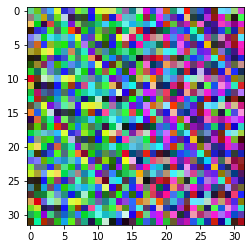

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
a=im[:,:,:,4]
plt.imshow(a)
print(im.shape)
print(a.shape)

You Need to write your code in this block.

img3.shape (3072, 1)


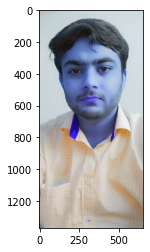

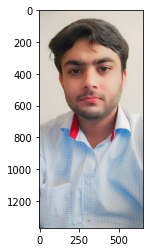

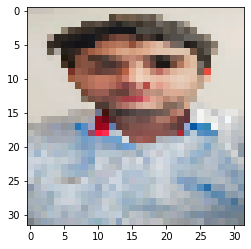

In [ ]:
from matplotlib import pyplot as plt 
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray
import numpy as np

img0=cv2.imread(test_image)
plt.figure()
plt.imshow(img0)

#coverting to RGB
img1=cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img1)
   

#Resize your image
img2=cv2.resize(img1,(32,32))
plt.figure()
plt.imshow(img2)   
   
#Reshape your image as we reshape the image of dataset
img3=np.reshape(img2,[3072,1],order="F")
print("img3.shape",img3.shape)

#Calculate Eucleadian distance between your image and dataset 
#defining function of distance calculation of pixels respectively
def euclidean_distance(row1,row2):
 distance=0.0
 for i in range(len(row1)):
  distance = distance + (row1[i] - row2[2])**2
 return sqrt(distance)




In this Block you need to fill the code for 1-NN. 

In [ ]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists


import numpy as np
dist = np.zeros(50)

for i in range(50):
  selectedimg=images[0:3072,i]
  dist[i] = euclidean_distance(img3,selectedimg)

print("Euclidean Distance", dist)
print("Minimun Distance", min(dist))

mindist=np.argmin(dist)
print("Index of Minimum Distance:", mindist)  



Euclidean Distance [559.14845971 546.07966452 565.31318753 550.29355802 573.54947476
 584.98803407 593.45345226 582.64139915 592.70987844 585.83359412
 535.07476113 541.22730899 596.44698004 578.59052879 572.53558841
 548.76679929 583.64972372 583.68056332 535.94869157 569.70957513
 562.01690366 562.22860119 590.28721823 596.94304586 585.83359412
 592.70987844 586.76485921 552.52420761 526.3886397  539.91943844
 570.60231335 590.53958377 545.11741854 553.93050106 565.59968175
 534.87101249 570.60231335 573.54947476 601.49563589 543.86119553
 550.29355802 553.93050106 593.17029595 577.37422873 567.26801426
 577.23218898 548.76679929 569.40583067 557.43071318 597.29808304]
Minimun Distance 526.3886396950451
Index of Minimum Distance: 28


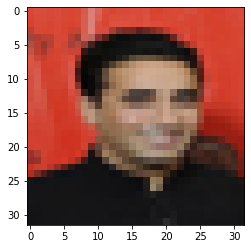

In [ ]:
plt.imshow(im[:,:,:,mindist])

In [ ]:
q=np.argsort(dist)
print(q)


[28 35 10 18 29 11 39 32  1 15 46 40  3 27 33 41 48  0 20 21  2 34 44 47
 19 36 30 14 37  4 45 43 13  7 16 17  5 24  9 26 22 31 25  8 42  6 12 23
 49 38]



Write code for 3 NN


index of nearest neighbours 28
label of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 526.3886396950451
index of nearest neighbours 35
label of nearest neighbours [array(['aishwarya rai'], dtype='<U13')]
Euclidean Distance of neighbours 534.8710124880578
index of nearest neighbours 10
label of nearest neighbours [array(['tom cruise'], dtype='<U10')]
Euclidean Distance of neighbours 535.0747611315637
['tom cruise']


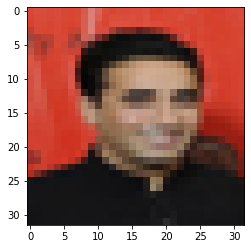

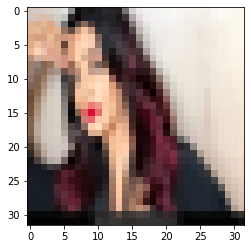

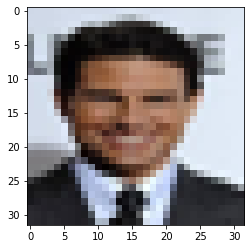

In [ ]:
#3 NN
for i in range(3):
 a=(q[i])
 print("index of nearest neighbours",a)
 print("label of nearest neighbours",label[a])
 print("Euclidean Distance of neighbours",dist[a])
 plt.figure()
 plt.imshow(im[:,:,:,a])
 


values, counts = np.unique(label[a], return_counts=True)
y= values[np.argmax(counts)]
print(y)


Write code for 5 NN

index of nearest neighbours 28
index of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 526.3886396950451
index of nearest neighbours 35
index of nearest neighbours [array(['aishwarya rai'], dtype='<U13')]
Euclidean Distance of neighbours 534.8710124880578
index of nearest neighbours 10
index of nearest neighbours [array(['tom cruise'], dtype='<U10')]
Euclidean Distance of neighbours 535.0747611315637
index of nearest neighbours 18
index of nearest neighbours [array(['sanam baloch'], dtype='<U12')]
Euclidean Distance of neighbours 535.9486915741095
index of nearest neighbours 29
index of nearest neighbours [array(['bilawal bhutto'], dtype='<U14')]
Euclidean Distance of neighbours 539.9194384350317
label of your image: [array(['bilawal bhutto'], dtype='<U14')]


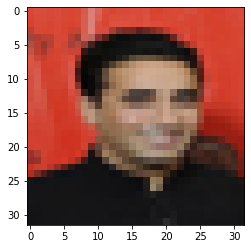

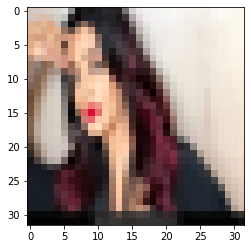

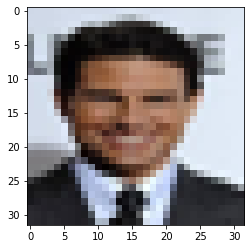

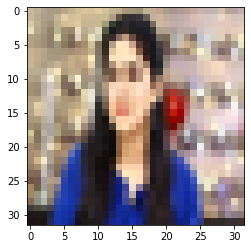

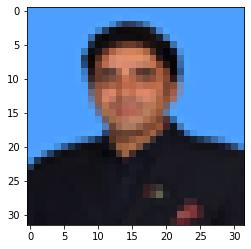

In [ ]:
#Write code for 5 NN


for i in range(5):
 b=(q[i])
 print("index of nearest neighbours",b)
 print("index of nearest neighbours",label[b])
 print("Euclidean Distance of neighbours",dist[b])
 plt.figure()
 plt.imshow(im[:,:,:,b])

values, counts = np.unique(b, return_counts=True)
y= values[np.argmax(counts)]
print("label of your image:",label[y])